<a href="https://colab.research.google.com/github/nikenhpsr/projects/blob/main/Simple_Linear_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regression Analysis**

---


**GENERAL MODEL**

A simple linear regression model assumes that a linear relationship exists between the conditional expectation of a dependent variable,  *y* , and an independent variable,  *x*.  The assumed relationship in linear regression has the form:

\begin{equation}
  y_{i}=\beta_{1}+\beta_{2}x_{i}+e_{i},
  \label{eq:simplelm}
\end{equation}

where
1.   $y$  is the dependent variable
2.   $x$  is the independent variable
3.   $e$  is an error term
4.   $\sigma^2$  is the variance of the error term
5.   $\beta_1$  is the intercept parameter or coefficient
6.   $\beta_2$   is the slope parameter or coefficient
7.   $i$  stands fot the $i$ -th observation in the dataset,  $i=1,2,...,N$ 
8.   $N$  is the number of observations in the dataset



The *predicted*, or estimated value of  $y$  given  $x$  is given by: 

\begin{equation}
 \hat{y} = b_{1} + b_{2} x 
 \label{eq:pred1}
\end{equation}

in general, the hat symbol indicates an estimated or a predicted value.

**BEST FITTING LINE**

When we use  $\hat{y}_i=b_0+b_1x_i$ to predict the actual response $y_i$, we make a prediction error (or residual error) of size:
\begin{equation}
  e_i=y_i-\hat{y}_i,
  \label{eq:predicterror}
\end{equation}
A line that fits the data "best" will be one for which the n prediction errors — one for each observed data point — are as small as possible in some overall sense. One way to achieve this goal is to invoke the "least squares criterion," which says to "minimize the sum of the squared prediction errors." That is:

*   The equation of the best fitting line is: $\hat{y}_i=b_0+b_1x_i$
*   Find the values $b_0$ and $b_1$ that make the sum of the squared prediction errors the smallest it can be.
*   We need to find the values $b_0$ and $b_1$ that minimize:
\begin{equation}
  Q=\sum_{i=1}^{n}(y_i-\hat{y}_i)^2
  \label{eq:minpred}
\end{equation}

The formulas are determined using methods of calculus. We minimize the equation for the sum of the squared prediction errors:

\begin{equation}
  Q=\sum_{i=1}^{n}(y_i-(b_0+b_1x_i))^2
  \label{eq:minexact}
\end{equation}

(that is, take the derivative with respect to $b_0$ and $b_1$, set to 0, and solve for $b_0$ and $b_1$) and get the "least squares estimates" for $b_0$ and $b_1$:

\begin{equation}
  b_0=\bar{y}-b_1\bar{x}
  \label{eq:bnol}
\end{equation}

and
\begin{equation}
  b_1=\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}
  \label{eq:bsatu}
\end{equation}


**EXAMPLE OF DATA AND PROBLEM**

First install the datarium package using *devtools::install_github("kassmbara/datarium")*, then load and inspect the marketing data as follow:
```
# Load the package
data("marketing", package = "datarium")
head(marketing, 4)

```
This data contain the impact of three advertising media (youtube, facebook, newspaper) on sales. Data are the advertising budget in thousands of dollars along with the sales.
```
##   youtube facebook newspaper sales
## 1   276.1     45.4      83.0  26.5
## 2    53.4     47.2      54.1  12.5
## 3    20.6     55.1      83.2  11.2
## 4   181.8     49.6      70.2  22.2
```

**VISUALIZATION**

Create scatter plot to descriptively display relationship of youtube advertisement and sales.
```
ggplot(marketing, aes(x = youtube, y = sales)) +
  geom_point() +
  stat_smooth()
```
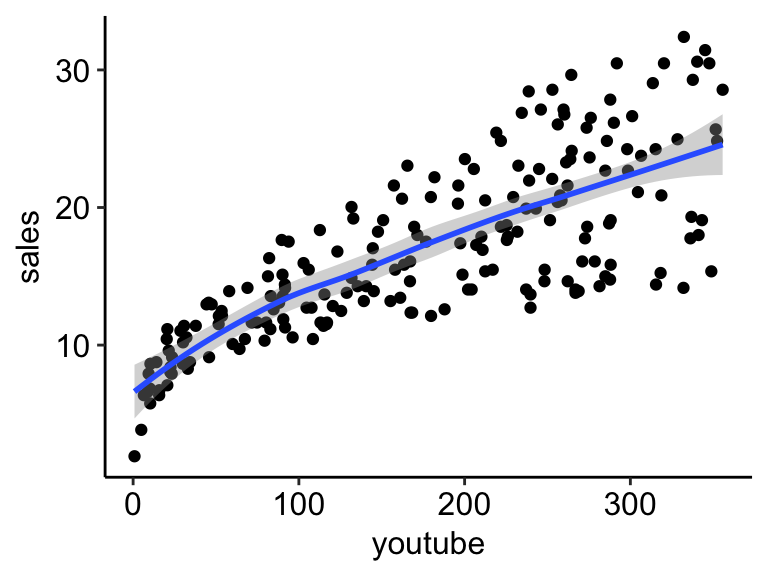

The graph above suggests a linearly increasing relationship between the **sales** and the **youtube** variables. This is a good thing, because, one important assumption of the linear regression is that the relationship between the outcome and predictor variables is linear and additive.

It’s also possible to compute the correlation coefficient between the two variables using the R function **cor()**:
```
cor(marketing$sales, marketing$youtube)
```
```
## [1] 0.782
```

The correlation coefficient measures the level of the association between two variables x and y. Its value ranges between -1 (perfect negative correlation: when x increases, y decreases) and +1 (perfect positive correlation: when x increases, y increases).

A value closer to 0 suggests a weak relationship between the variables. A low correlation (-0.2 < x < 0.2) probably suggests that much of variation of the outcome variable (y) is not explained by the predictor (x). In such case, we should probably look for better predictor variables. A correlation value closer to 1 meaning there is a strong linear relationship between variables.

In our example, the correlation coefficient is large enough, so we can continue by building a linear model of y as a function of x.

**COMPUTATION**

The simple linear regression tries to find the best line to predict sales on the basis of youtube advertising budget.

The linear model equation can be written as follow: 

sales = $b_0$ + $b_1$youtube

The R function *lm()* can be used to determine the beta coefficients of the linear model:

```
model <- lm(sales ~ youtube, data = marketing)
model
```
```
## 
## Call:
## lm(formula = sales ~ youtube, data = marketing)
## 
## Coefficients:
## (Intercept)      youtube  
##      8.4391       0.0475
```
The results show the intercept and the beta coefficient for the youtube variable.

**INTERPRETATION**

From the output above:
1.   The estimated regression line equation can be written as follow: sales = 8.44 + 0.048*youtube
2.   The intercept ($b_0$) is 8.44. It can be interpreted as the predicted sales unit for a zero youtube advertising budget. Recall that, we are operating in units of thousand dollars. This means that, for a youtube advertising budget equal zero, we can expect a sale of 8.44 x 1000 = 8440 dollars.
3.   The regression $\beta_1$ coefficient for the variable youtube ($b_1$), also known as the slope, is 0.048. This means that, for a youtube advertising budget equal to 1000 dollars, we can expect an increase of 48 units (0.048 x 1000) in sales. That is, sales = 8.44 + (0.048 x 1000) = 56.44. As we are operating in units of thousand dollars, this represents a sale of $56,440.

**REGRESSION LINE**

To add the regression line onto the scatter plot, you can use the function ```stat_smooth() [ggplot2]```. 
By default, the fitted line is presented with confidence interval around it. The confidence bands reflect the uncertainty about the line. If you don’t want to display it, specify the option ```se = FALSE``` 
in the function ```stat_smooth()```.
```
ggplot(marketing, aes(youtube, sales)) +
  geom_point() +
  stat_smooth(method = lm)
```
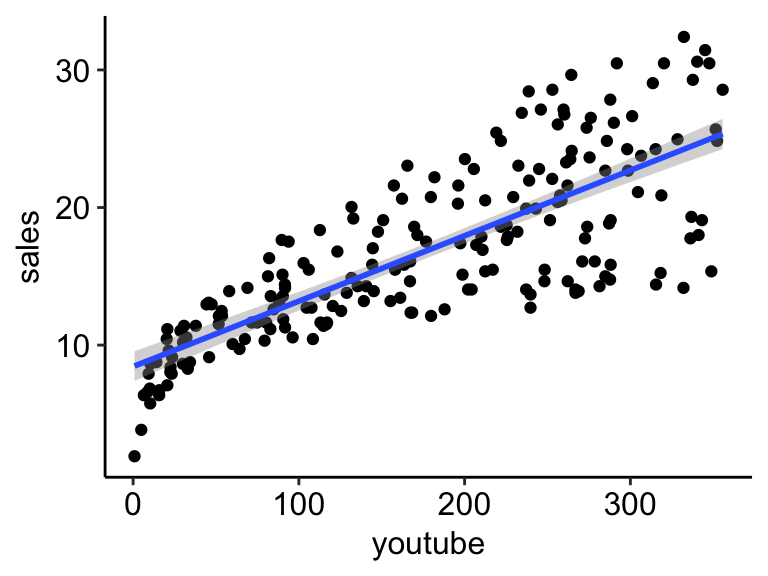

**MODEL SUMMARY**

 Statistical summary of the model can be called by using the R function ```summary()```:
```
summary(model)
```
```
## 
## Call:
## lm(formula = sales ~ youtube, data = marketing)
## 
## Residuals:
##    Min     1Q Median     3Q    Max 
## -10.06  -2.35  -0.23   2.48   8.65 
## 
## Coefficients:
##             Estimate Std. Error t value Pr(>|t|)    
## (Intercept)  8.43911    0.54941    15.4   <2e-16 ***
## youtube      0.04754    0.00269    17.7   <2e-16 ***
## ---
## Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
## 
## Residual standard error: 3.91 on 198 degrees of freedom
## Multiple R-squared:  0.612,  Adjusted R-squared:  0.61 
## F-statistic:  312 on 1 and 198 DF,  p-value: <2e-16
```
The summary outputs shows 6 components, including:

1.  **Call**. Shows the function call used to compute the regression model.
2.  **Residuals**. Provide a quick view of the distribution of the residuals, which by definition have a mean zero. Therefore, the median should not be far from zero, and the minimum and maximum should be roughly equal in absolute value.
3.  **Coefficients**. Shows the regression beta coefficients and their statistical significance. Predictor variables, that are significantly associated to the outcome variable, are marked by stars.
4.  **Residual standard error** (RSE), **R-squared** ($R^2$) and the **F-statistic** are metrics that are used to check how well the model fits to our data.

**COEFFICIENTS SIGNIFICANCE**

The coefficients table, in the model statistical summary, shows:

1.  The estimates of the beta coefficients
2.  The standard errors (SE), which defines the accuracy of beta coefficients. For a given beta coefficient, the SE reflects how the coefficient varies under repeated sampling. It can be used to compute the confidence intervals and the t-statistic.
3.  The t-statistic and the associated p-value, which defines the statistical significance of the beta coefficients.

```
##             Estimate Std. Error t value Pr(>|t|)
## (Intercept)   8.4391    0.54941    15.4 1.41e-35
## youtube       0.0475    0.00269    17.7 1.47e-42
```

**t-statistics and p-values**
For a given predictor, the t-statistic (and its associated p-value) tests whether or not there is a statistically significant relationship between a given predictor and the outcome variable, that is whether or not the beta coefficient of the predictor is significantly different from zero.

The statistical hypotheses are as follow:

*  Null hypothesis ($H_0$): the coefficients are equal to zero (i.e., no relationship between x and y)
*  Alternative Hypothesis ($H_1$): the coefficients are not equal to zero (i.e., there is some relationship between x and y)

The higher the t-statistic (and the lower the p-value), the more significant the predictor. The symbols to the right visually specifies the level of significance. The line below the table shows the definition of these symbols; one star means $0.01 < p < 0.05$. The more the stars beside the variable’s p-value, the more significant the variable.

A statistically significant coefficient indicates that there is an association between the predictor (x) and the outcome (y) variable.

The t-statistic is a very useful guide for whether or not to include a predictor in a model. High t-statistics (which go with low p-values near 0) indicate that a predictor should be retained in a model, while very low t-statistics indicate a predictor could be dropped (*P. Bruce and Bruce*, 2017).

**MODEL ACCURACY**

The overall quality of the linear regression fit can be assessed using the following three quantities, displayed in the model summary:

1.  The Residual Standard Error (RSE).
2.  The R-squared ($R^2$)
3.  F-statistic
```
##    rse r.squared f.statistic  p.value
## 1 3.91     0.612         312 1.47e-42
```


1. **Residual standard error (RSE).**

The RSE (also known as the model sigma) is the residual variation, representing the average variation of the observations points around the fitted regression line. This is the standard deviation of residual errors.

RSE provides an absolute measure of patterns in the data that can’t be explained by the model. When comparing two models, the model with the small RSE is a good indication that this model fits the best the data.

Dividing the RSE by the average value of the outcome variable will give you the prediction error rate, which should be as small as possible.

In our example, RSE = 3.91, meaning that the observed sales values deviate from the true regression line by approximately 3.9 units in average.

Whether or not an RSE of 3.9 units is an acceptable prediction error is subjective and depends on the problem context. However, we can calculate the percentage error. In our data set, the mean value of sales is 16.827, and so the percentage error is 3.9/16.827 = 23%.
```
sigma(model)*100/mean(marketing$sales)
```
```
## [1] 23.2
```
2. **R-squared and Adjusted R-squared**:

The R-squared ($R^2$) ranges from 0 to 1 and represents the proportion of information (i.e. variation) in the data that can be explained by the model. The adjusted R-squared adjusts for the degrees of freedom.

The $R^2$ measures, how well the model fits the data. For a simple linear regression, $R^2$ is the square of the Pearson correlation coefficient.

A high value of $R^2$ is a good indication. However, as the value of $R^2$ tends to increase when more predictors are added in the model, such as in multiple linear regression model, you should mainly consider the adjusted R-squared, which is a penalized $R^2$ for a higher number of predictors.

An (adjusted) $R^2$ that is close to 1 indicates that a large proportion of the variability in the outcome has been explained by the regression model.
A number near 0 indicates that the regression model did not explain much of the variability in the outcome.

3. **F-Statistic**:

The F-statistic gives the overall significance of the model. It assess whether at least one predictor variable has a non-zero coefficient.

In a simple linear regression, this test is not really interesting since it just duplicates the information in given by the t-test, available in the coefficient table. In fact, the F test is identical to the square of the t test: $312.1 = (17.67)^2$. This is true in any model with 1 degree of freedom.

The F-statistic becomes more important once we start using multiple predictors as in multiple linear regression.

A large F-statistic will corresponds to a statistically significant p-value ($p < 0.05$). In our example, the F-statistic equal 312.14 producing a p-value of 1.46e-42, which is highly significant.

**SUMMARY**

After computing a regression model, a first step is to check whether, at least, one predictor is significantly associated with outcome variables.

If one or more predictors are significant, the second step is to assess how well the model fits the data by inspecting the Residuals Standard Error (RSE), the $R^2$ value and the F-statistics. These metrics give the overall quality of the model.

* RSE: Closer to zero the better
* R-Squared: Higher the better
* F-statistic: Higher the better

**REFERENCES**

Bruce, Peter, and Andrew Bruce. 2017. *Practical Statistics for Data Scientists*. O’Reilly Media.

James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. 2014. *An Introduction to Statistical Learning: With Applications in R*. Springer Publishing Company, Incorporated.

Johnson, Richard A., and Gouri K. Bhattacharyya. 2006. *Statistics: principles and methods*. Hoboken, NJ: John Wiley & Sons.

Kassambara, Alboukadel. 2018. *Simple Linear Regression in R*. Statistical Tools for High-Throughput Data Analysis.	http://www.sthda.com/english/articles/40-regression-analysis/167-simple-linear-regression-in-r/.